Główne biblioteki:
- `numpy.random` i `random` - generowanie danych losowych z różnych rozkładów;
- `matplotlib.pyplot` - tworzenie histogramów, wizualizacja danych;
- `seaborn` - bardziej zaawansowane wykresy.
- `scipy.stats` - teoretyczne funkcje gęstości prawdopodobieństwa i CDF

In [180]:
import random 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Gererowanie danych.
Najważeniejsze rozkłady:
- Bernoulli;
- Binomial;
- Jednostajny;
- Normalny;
- Poisson;
- Wykładniczy.

In [181]:
#jesli chcemy miec powtarzalnosc wynikow dla kazdego uruchomienia 
#programu, musimy ustalic ziarno:

np.random.seed(1)

#z np.random wybieramy interesujacy nas rozklad:
print(np.random.rand())

0.417022004702574


**Rozkłady w `np.random`**
* **Jednostajny:** 
    ```python
    np.random.uniform(low, high, size)
* **Normalny:**
    ```python
    np.random.normal(loc = mean, scale = std deviation, size), np.random.standard_normal(size)
* **Jednostajny dyskretny z przedziału:** 
    ```python
    np.random.randint(low, high, size) 
    #generuje liczby całkowite z przedziału od low do high-1
* **Losowanie elementów z danego zbioru:** 
    ```python
    np.random.choice(array, size, replace, p)
* **Dwumienny:** 
    ```python
    np.random.binomial(n, p, size)
* **Poisson:**
    ```python 
    np.random.poisson(lam, size)
* **Wykładniczy:** 
    ```python
    np.random.exponential(scale = expectation)
* **Wielowymiarowy normalny:** 
    ```python
    np.random.multivariate_normal(mean, cov, size)
    (zwraca tablice z wektorami losowymi)

__Przykłady:__

In [182]:
#rzucamy 5 razy symetryczną kostką do gry 
print(np.random.choice(range(1,7), size=5, replace=True, p=None))

#teraz rzucamy 5 razy niesymetryczną kostką
print(np.random.choice(range(1,7), size=5, p=[1/4,1/4] + ([1/8]*4)))

#generujemy numpy tablicę zawierającą wyniki 10000 niezależnych eksperymentów losowych, każdy o rozkładzie Poissona ze średnią 3:
poisson_arr = np.random.poisson(lam=3, size=1000)
print(np.mean(poisson_arr))

[5 1 2 4 6]
[1 1 1 2 2]
3.02


**Zadanie 1.**
Oszacuj prawdopodobieństwo, z jakim suma n=5 niezależnych zmiennych losowych o rozkładzie jednostajnym (standardowym) jest większa niż 1. Spróbuj wykonać podobny eksperyment dla innych liczb i zgadnąć wzór ogólny dla n. 
**Zadanie dodatkowe:**
Kot w butach wchodzi do baru i wielokrotnie nalewa mleka do kubka o objętości jeden. Za każdym razem ilość nalanego mleka jest zmienną losową o rozkładzie jednostajnym. Oblicz, ile razy średnio kot w butach musi przechylić karton, zanim wypełni on swój kubek do pełna. (Najpierw oszacuj wynik eksperymentalnie, a następnie postaraj się uzyskać dokładną wartość oczekiwaną i porównaj wyniki).

**Zadanie 2.**
Napisz bezargumentową funkcję symulującą rzut symetryczną monetą, a następnie za jej pomocą napisz funkcję losującą liczbę ze standardowego rozkładu jednostajnego. Jedyne dostępne funkcjonalności losujące to: 
`np.random.binomial(5, 0.5, 1)` oraz `np.random.binomial(6, 0.5, 1)`.

**Zadanie 3.**
Napisz funkcję `asymmetrical_coin(p = np.random.rand())` symulującą rzut niesymetryczną monetą. Następnie, zastanów się jak zasymulować rzut niesymetryczną monetą z prawdopodobieństwem wypadnięcia reszki równym `q` mając do dyspozycji niesymetryczną monetę o nieznanym rozkładzie (asymmetrical_coin()). Zastanów się, ile średnio rzutów potrzeba, aby przeprowadzić tę symulację.

**Zadanie 4.**
Oszacuj średnią ilość rzutów symetryczną sześcienną kostką do pierwszego wypadnięcia (spójnej) sekwencji 66 oraz jaka średnio będzie suma oczek ze wszystkich dotychczasowych rzutów w tym momencie. Następnie napisz funkcję szacującą ilość rzutów symetrycznej kostki d-n (n ścian) do momentu wypadnięcia danej sekwencji. Spróbuj policzyć wynik dla n=26 i sekwencji odpowiadającej słowu abracadabra. 
**Zadanie dodatkowe (trudne)**:
Dany jest skończony alfabet $A$. W każdym momencie do początkowo pustego napisu dodawana jest do niego losowo wybrana litera ze zbioru $A$ z ustalonym rozkładem $p$. Znajdź wzór ogólny na średni czas oczekiwania do momentu pojawienia się w naszym napisie danego podsłowa. Jak myślisz, od jakich strukturalnych parametrów szukanego podsłowa (oprócz jego długości) może zależeć ten czas?

**Zadanie 5.**
Grasz w następującą grę. W każdym ruchu zostaje rzuconych 20 symetrycznych monet. Po zobaczeniu wyniku możesz zdecydować albo zakończyć grę i odebrać wygraną (w PLN) równą liczbie reszek na stole, albo dopłacić 1 PLN i grać dalej. Spróbuj przetestować kilka strategii, aby znaleźć tą, która maksymalizuje oczekiwaną sumaryczną wygraną w tej grze. Ile ona wynosi?

**Zadanie 6.**
W zbiórce internetowej, internauci kolejno i niezależnie wpłacają kwotę o rozkładzie wykładniczym, każdy o średniej $\frac{1}{5}$. Oszacuj średnią i wariancję liczby internatów, którzy dokonają wpłaty do momentu przekroczenia kwoty 10000. Zastosuj dwa podejścia: jedno wykorzystujące `np.random.poisson()` oraz drugie wykorzystujące `np.random.exponential()`.

__Tworzenie histogramu:__
Za tworzenie histogramu odpowiada funkcja `pyplot.hist` z pakietu matplotlib. Do jej najważniejszych parametrów należą:
* __data__ 
* __bins__
może być liczbą definiującą ilość równych przedziałów...
lub ciągiem określającym granice przedziałów!
* __range__ 
(min, max) obcina dane do zadanego przedziału
* __density__ = False
    True/False; jeśli ustawiony na True normalizuje dane do pewnego rozkładu prawdopodobieństwa
* __cumulative__ = False
    True/False; jeśli ustawiony na True obrazuje kumulatywny rozkład 
* __alpha__, __color__, __edgecolor__ itd...
    ustalają odpowiednio poziom przezroczystości wykresu, kolor wypełnienia i kolor obwódki 
    



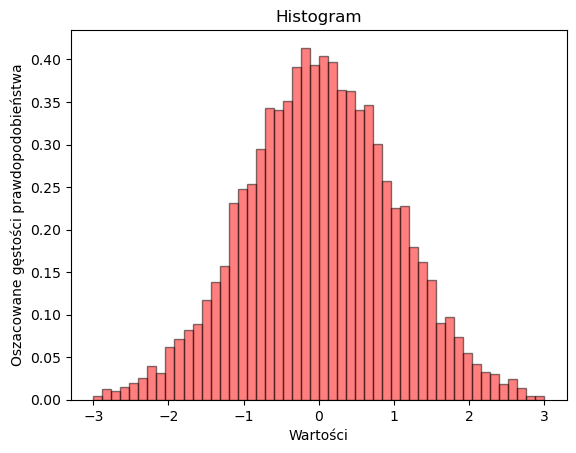

In [183]:
data = np.random.standard_normal(size=10000)

#tworzymy histogram za pomocą plt.hist
#argument density=True służy normalizacji wykresu
#warto poeksperymentować z argumentem bins
plt.hist(data, bins=50, density=True, alpha = 0.5, color='r', edgecolor='black', range=(-3,3), cumulative=False)

plt.title('Histogram')
plt.xlabel('Wartości')
plt.ylabel('Oszacowane gęstości prawdopodobieństwa')


#piszemy data;, aby nie wyświetlać naszej tablicy
data;

Jeśli chcemy porównać nasz znormalizowany histogram z teoretyczną funkcją gęstości naszej zmiennej, możemy nanieść na histogram ową funkcję w następujący sposób:

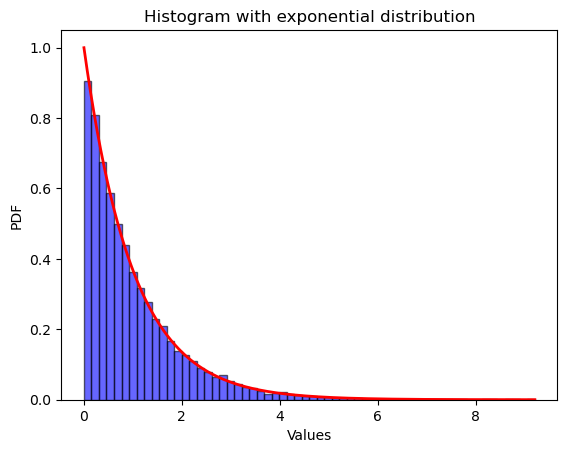

In [184]:
#funkcje gęstości bierzemy z biblioteki scipy.stats 
import scipy.stats as stats

data = np.random.exponential(1, size=10000)

x = np.linspace(np.min(data), np.max(data), 10000)
pdf_x = stats.expon.pdf(x, scale=1)

plt.hist(data, bins=60, density=True, alpha = 0.6, color='b', edgecolor = 'black')
plt.title('Histogram with exponential distribution')
plt.xlabel('Values')
plt.ylabel('PDF')
plt.plot(x, pdf_x, color='r', lw=2)
#lw ustawia szerokość linii 

Możemy postąpić analogicznie przy szacowaniu __dystrybuanty__ (___cdf___) rozkładu danych:

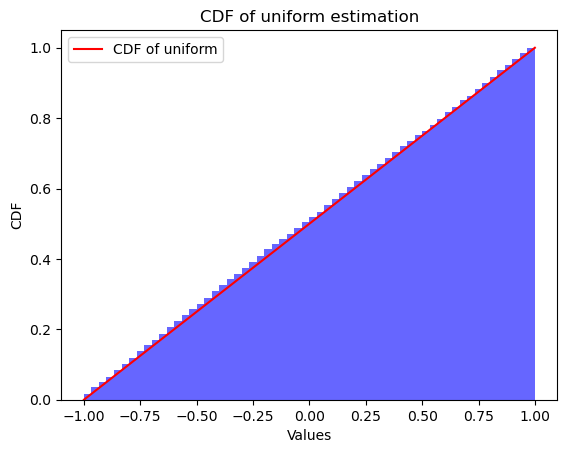

In [185]:
data = np.random.uniform(low=-1, high=1, size=10000)

x = np.linspace(np.min(data), np.max(data), 10000)
x_cdf = stats.uniform.cdf(x, loc=-1, scale=2)
#scale tutaj oznacza długość przedziału

fig, ax = plt.subplots()

ax.hist(data, bins=60, density=True, alpha = 0.6, color = 'b', cumulative = True)
ax.plot(x,x_cdf, color='red', lw=1.5, label = 'CDF of uniform')
ax.set(xlabel = 'Values', ylabel = 'CDF', title = 'CDF of uniform estimation')
ax.legend()


Możemy też korzystać z pakietu scipy.stats, aby generować dane o danym rozkładzie, korzystając z metody rvs (również zwracana jest numpy.ndarray).

In [186]:
from scipy.stats import binom

data = binom.rvs(n=5, p=0.5, size=10)
print(type(data))
print(data)

<class 'numpy.ndarray'>
[3 2 4 0 3 2 1 1 3 3]


Oczywiście możemy porównywać histogramy wizualnie, stawiając je obok siebie w jednej figurze:

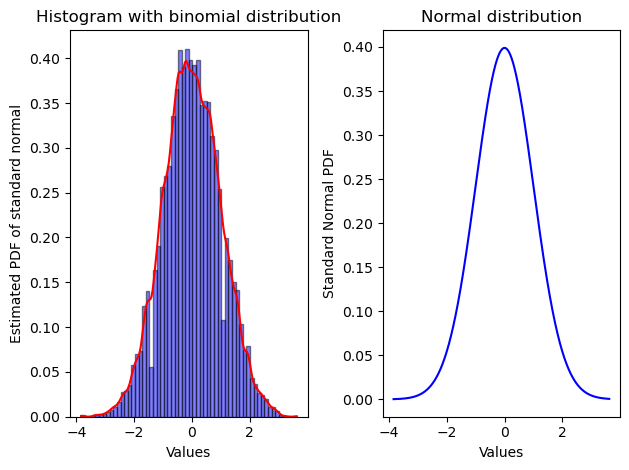

In [187]:
from scipy.stats import norm
from seaborn import kdeplot

np.random.seed(1)

data = np.random.binomial(n=1000, p=0.5, size=10000)
data = data - np.mean(data)
data = data/(np.var(data)**0.5)

fig, ax = plt.subplots(1,2)


ax[0].hist(data, bins=60, density=True, alpha = 0.5, color='b', edgecolor = 'black')
kdeplot(data, ax=ax[0], fill = False, color = 'r', clip=(min(data), max(data)), bw_adjust=0.5)
ax[0].set_title('Histogram with binomial distribution')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Estimated PDF of standard normal')

x = np.linspace(np.min(data), np.max(data), 1000)
pdf_x = norm.pdf(x)

ax[1].plot(x, pdf_x, color='b')
ax[1].set(xlabel='Values', ylabel='Standard Normal PDF', title='Normal distribution')

fig.tight_layout()
fig.savefig('comparison.png')



Mając pewne dane pochodzące z nieznanego rozkładu możemy użyć wykresu KDE (kernel density estimation), aby zwizualizować szacunkową gęstość tego rozkładu. Do celu potrzebujemy biblioteki `seaborn`.

Text(0.5, 1.0, 'Gaussian')

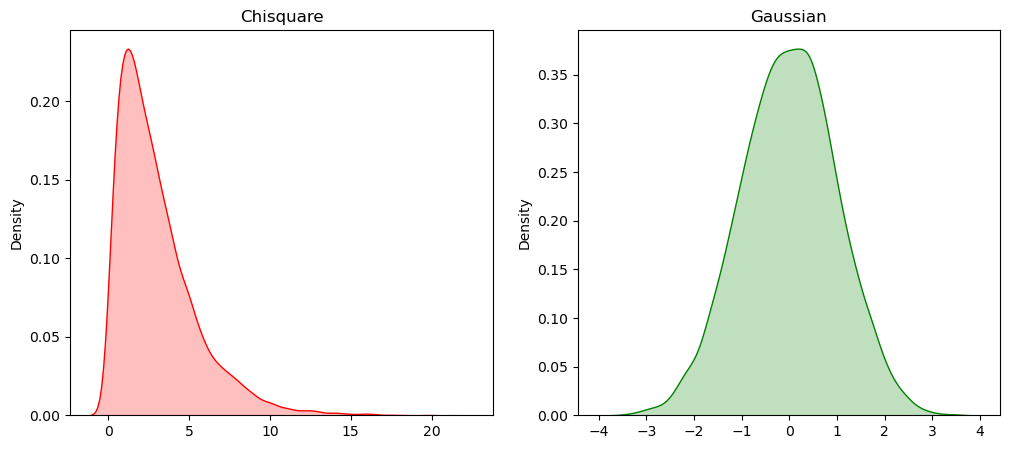

In [188]:
from seaborn import kdeplot as kde
from scipy import stats

data_chi = np.random.chisquare(3, 10000)
data_gaussian = stats.norm.rvs(scale=1, loc = 0, size=10000)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
kde(data_chi, fill=True, color='red')
plt.title('Chisquare')

plt.subplot(1,2,2)
kde(data_gaussian, fill=True, color='green')
plt.title('Gaussian')



Do ważniejszych parametrów funkcji `seaborn.kdeplot` należy tzw. _bandwidth_, który kontroluje poziom wygładzenia estymacji wykresu funkcji gęstości. Jeśli jego wartość jest mała, nasz wykres będzie bardziej wrażliwy na drobne fluktuacje w danych (możliwy _overfitting_). Wraz ze zwiększaniem wartości _bandwidth_ funkcja KDE staje się bardziej wygładzona, skutkując w utracie drobnych szczegółów w danych, dając w zamian bardziej ogólny obraz dystrybucji. (możliwy _underfitting_). Warto pobróbować kilka wartości, aby znaleźć złoty środek.

(0.0, 10.0)

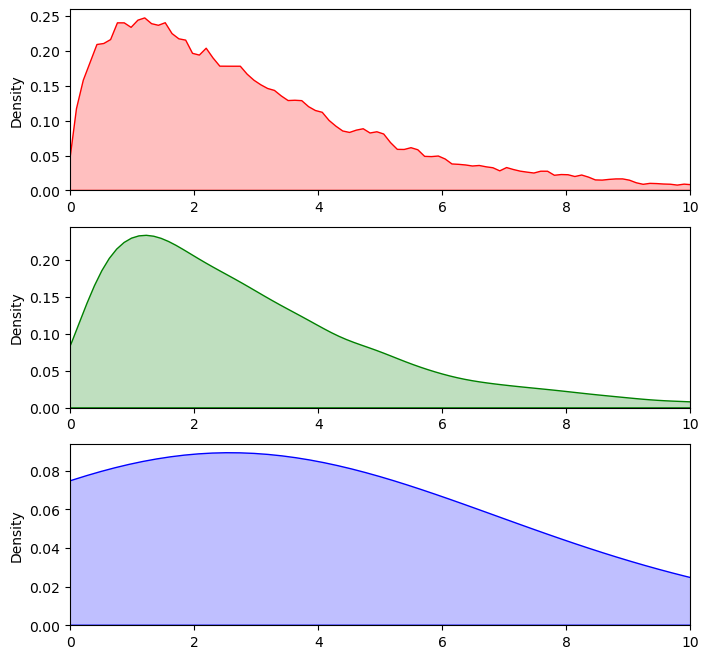

In [189]:
plt.figure(figsize=(8,8))

plt.subplot(3,1,1)
kde(data_chi, fill=True, color='red', bw_adjust=0.2)
plt.xlim(0,10)

plt.subplot(3,1,2)
kde(data_chi, fill=True, color='green', bw_adjust=1.0)
plt.xlim(0,10)

plt.subplot(3,1,3)
kde(data_chi, fill=True, color='blue', bw_adjust=10)
plt.xlim(0,10)



Inne ważne parametry `seaborn.kdeplot` obejmują:
* __fill__ (=shade)
False/True; aktywuje wypełnienie pod krzywą
* __clip__
odpowiednik ___range___ z `matplotlib.pyplot.hist`
* __cumulative__
* __lw__
określa szerokość linii wykresu.

___Seaborn___ umożliwia również nakładać wykres KDE na histogram, wykorzystując ___seaborn.histplot___ z parametrem `kde=True`

Jeśli chcemy oszacować dystrybuantę bądź gęstość naszego rozkładu, nie musimy ograniczać się do wizualizacji. Moduł `scipy.stats` zapewnia funkcję `gaussian_kde`, która przyjmuje dane i zwraca obiekt będący funkcją (szacunkową funkcją gęstości rozkładu tych danych):

<Axes: ylabel='Density'>

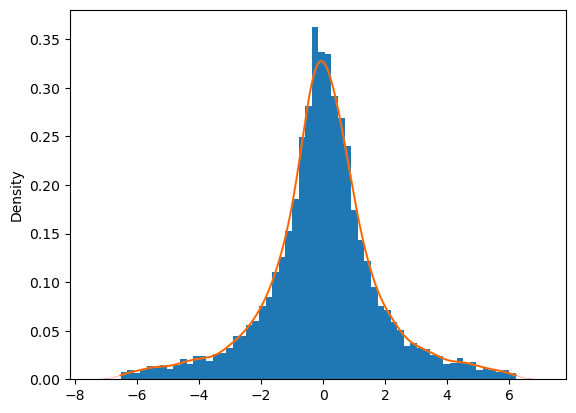

In [190]:
from scipy.stats import gaussian_kde

data = np.random.standard_cauchy(size=10000)

#ze względu na specyfikę rozkładu Cauchyego, dobrym pomysłem 
#będzie pozbycie się tzw. outliers

lower_bound = np.percentile(data, 5)
upper_bound = np.percentile(data,95)

def outlier_filter(x):
    return (x>=lower_bound) and (x<= upper_bound)
outlier_filter = np.vectorize(outlier_filter)
data_filter = outlier_filter(data)
data = data[data_filter]

kde = gaussian_kde(data)
kde_vec = np.vectorize(kde)

x = np.linspace(np.min(data), np.max(data), 10000)
pdf = kde_vec(x)

plt.hist(data, bins=60, density=True)
plt.plot(x, pdf)

###dla porownania naniesmy jeszcze wykres szacunkowego pdf uzyskanego metodą kde:
sns.kdeplot(data, fill=False, color='red', lw=0.2)
###widać, że wykresy się pokrywają



W podobny sposób możemy szacować dystrybuantę. Biblioteka `statsmodels` udostępnia klasę `ECDF`, która szybko oblicza empiryczną dystrybuantę. Pouczającym zadaniem jest napisanie samemu takiej funkcji.

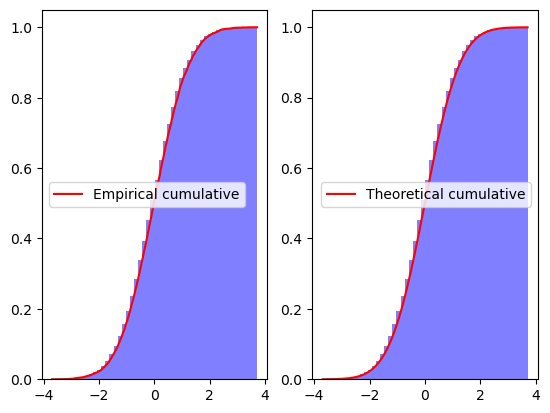

In [191]:
from scipy.stats import norm

def cdf_estimation(x, sorted_data: np.ndarray) -> float:
    result = np.searchsorted(sorted_data, x, side='right')/len(sorted_data)
    return result

data = np.random.standard_normal(size=10000)
sorted_data = np.sort(data)

x = np.linspace(min(data), max(data), 10000)
norm_ecdf = cdf_estimation(x, sorted_data)
norm_cdf = norm.cdf(x)

fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].plot(x, norm_ecdf, label = "Empirical cumulative", color = 'red')
ax[0].hist(data, bins=50, cumulative = True, density=True, alpha = 0.5, color = 'blue')
ax[0].legend()

ax[1].plot(x, norm_cdf, label = "Theoretical cumulative", color = 'red')
ax[1].hist(data, bins=50, cumulative = True, density=True, alpha = 0.5, color = 'blue')
ax[1].legend()

data;


Testowanie dystrybucji i ___scipy.stats:___
W wielu przypadkach heurystyka i  wizualna ocena pozwala stwierdzić, że dystrybucja naszych danych z wystarczającą dokładnością przypomina oczekiwaną. Jednak na dłuższą metę konieczne będą standardowe metody pozwalające wyrazić to podobieństwo w sposób ilościowy, a także bardziej ścisły algorytm na testowanie hipotez dotyczących rozkładu. Przykładem takiej metody jest następujące: 
1. Naszym celem jest przetestowanie hipotezy zerowej, mówiącej, że pewne zjawisko ma dany rozkład teoretyczny.
2. Porównujemy empiryczny rozkład danych z rozkładem teoretycznym i obliczamy odległość między nimi w pewnej ustalonej metryce.
3. Obliczamy tzw. ___p value___, czyli prawdopodobieństwo warunkowe, że przy założeniu hipotezy zerowej, losowo pobrane dane empiryczne osiągną wynik (odległość od rozkładu teoretycznego) nie lepszy niż ten z punktu 2. Jeśli ___p value___ jest wystarczająco małe (zazwyczaj jeśli $p<0.05$), odrzucamy hipotezę zerową.

__Przykład 1.__
Sprawdzanie, czy sześcienna kostka jest uczciwa.
W przypadku danych kategorycznych o pewnym rozkładzie dyskretnym możemy posłużyć się tzw. testem ___Chi-Square___, który jest dostępny w module `scipy.stats`.

In [192]:
from scipy.stats import chisquare

np.random.seed(1)
rolls = np.random.choice([1,2,3,4,5,6], size = 600, p=None)
empirical_counts = np.bincount(rolls, minlength=7)[1:]
expected_counts = np.array([100]*6)

chi_stat, p_value = chisquare(empirical_counts, expected_counts)

print(chi_stat == np.sum((empirical_counts - expected_counts) ** 2 / expected_counts))

print(f'Empirical counts: {empirical_counts}')
print(f'Chi_stat: {chi_stat}')
print(f'P_value: {p_value}')

##wysokie chi_stat i niskie p_value przemawiają za odrzuceniem hipotezy zerowej

True
Empirical counts: [104  90 100  96 110 100]
Chi_stat: 2.32
P_value: 0.8033249910842464


True
Empirical counts: [200 191  51  57  53  48]
Chi_stat: 274.44
P_value: 3.1141521737431966e-57


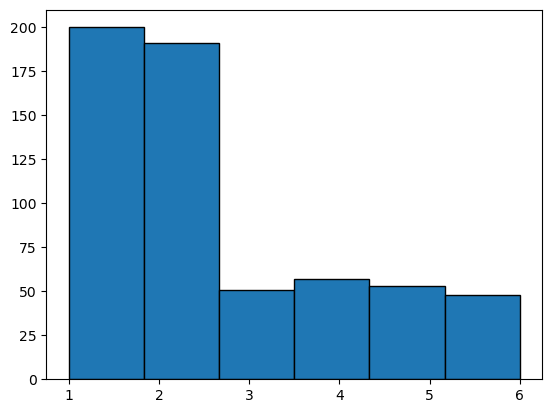

In [193]:
from scipy.stats import chisquare

np.random.seed(1)
rolls = np.random.choice([1,2,3,4,5,6], size = 600, p=[1/3, 1/3, 1/12,1/12,1/12,1/12])
empirical_counts = np.bincount(rolls, minlength=7)[1:]
expected_counts = np.array([100]*6)

plt.hist(rolls, bins=6, edgecolor = 'black')

chi_stat, p_value = chisquare(empirical_counts, expected_counts)

print(chi_stat == np.sum((empirical_counts - expected_counts) ** 2 / expected_counts))

print(f'Empirical counts: {empirical_counts}')
print(f'Chi_stat: {chi_stat}')
print(f'P_value: {p_value}')

##wysokie chi_stat i niskie p_value przemawiają za odrzuceniem hipotezy zerowej

Oprócz testowania dystrybucji pod wieloma kątami, `scipy.stats` oferuje wiele funkcji pozwalających na sprawne obliczanie wielu parametrów najważniejszych rozkładów:

In [194]:
import scipy.stats as stats
print(stats.norm.pdf(0, loc=0, scale=1))
print(stats.binom.pmf(3, n=7, p=0.4))
print(stats.poisson.cdf(12, mu=13))
print(stats.poisson(mu=3).mean())
print(stats.multivariate_normal.pdf([1/2, 3/2], [1,1], cov=[[1,0],[0,1]]))

0.3989422804014327
0.290304
0.46310474709968075
3.0
0.12394999430965298


Mając szacunkową funkcję gęstości (uzyskaną na przykład za pomocą `scipy.stats.gaussian_kde`) możemy obliczyć różne własności tej dystrybucji, numerycznie całkując odpowiednie funkcje (jako alternatywa do metody Monte-Carlo):

In [195]:
from scipy.stats import gaussian_kde
from scipy.integrate import quad


data = np.random.binomial(n = 100, p=0.3, size=20000)

kde = gaussian_kde(data)
##teraz calkujemy funkcję x^2 * kde, aby oszacować drugi moment rozkładu dwumiennego:
def integrand(x: float) -> float:
    return (x**2) * kde(x)

numerical_second_moment, _ = quad(integrand, 0, 100)
monte_carlo_second_moment = np.mean(data**2)

theoretical_second_moment = (100 * 0.3) + (9900 * 0.3 * 0.3)

print(numerical_second_moment)
print(monte_carlo_second_moment)
print(theoretical_second_moment)





921.361811770811
920.9652
921.0


Najważniejsze testy statystyczne:
* __T-Test__
* __Chi-Squared Test__
* __Kolmogorov-Smirnov Test__
* __Shapiro-Wilk Test__
* __Mann-Whitney U Test__